In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [4]:
len(x_train[0]), len(x_train[2])

(218, 141)

In [5]:
## Here words are only tokenizer
## So calculating the total words

word_list = []
for sentence in x_train:
    word_list += sentence

words = set(word_list)
vocab_size = len(words)

In [6]:
## Now finding maximum size of sentence in review

max_size = max([len(sentence) for sentence in x_train])
print(max_size)

2494


In [7]:
# Padding the sentences
from tensorflow.keras.preprocessing.sequence import pad_sequences

def padd(data):
    return pad_sequences(data, padding='post', truncating='post', maxlen=max_size)

x_train_pad = padd(x_train)
x_test_pad = padd(x_test)

In [8]:
x_train_pad.shape, x_test_pad.shape

((25000, 2494), (25000, 2494))

In [9]:
import numpy as np

## Checking no of category
np.unique(y_train)

array([0, 1])

In [10]:
## Now creating LSTM model
from tensorflow.keras import layers, models

model = models.Sequential([
                           layers.Embedding(vocab_size, output_dim = 16, input_length=max_size),
                           layers.Bidirectional(layers.LSTM(128)),
                           layers.Dropout(0.3),
                           layers.Dense(512, activation = 'relu'),
                           layers.Dense(1, activation = 'sigmoid')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2494, 16)          1417360   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              148480    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 512)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 1,697,937
Trainable params: 1,697,937
Non-trainable params: 0
______________________________________________

In [11]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
history = model.fit(x_train_pad, y_train, epochs = 30, batch_size = 64, validation_data = (x_test_pad, y_test))

Epoch 1/30
391/391 [==============================] - 119s 283ms/step - loss: 0.5451 - accuracy: 0.7045 - val_loss: 0.3738 - val_accuracy: 0.8602
Epoch 2/30
391/391 [==============================] - 110s 282ms/step - loss: 0.2509 - accuracy: 0.9070 - val_loss: 0.4312 - val_accuracy: 0.8034
Epoch 3/30
391/391 [==============================] - 112s 286ms/step - loss: 0.1835 - accuracy: 0.9335 - val_loss: 0.4135 - val_accuracy: 0.8513
Epoch 4/30
391/391 [==============================] - 112s 287ms/step - loss: 0.0891 - accuracy: 0.9716 - val_loss: 0.4714 - val_accuracy: 0.8267
Epoch 5/30
391/391 [==============================] - 112s 285ms/step - loss: 0.0586 - accuracy: 0.9819 - val_loss: 0.5464 - val_accuracy: 0.7723
Epoch 6/30
391/391 [==============================] - 110s 283ms/step - loss: 0.0433 - accuracy: 0.9870 - val_loss: 0.6483 - val_accuracy: 0.7680
Epoch 7/30
391/391 [==============================] - 110s 282ms/step - loss: 0.0383 - accuracy: 0.9880 - val_loss: 0.8083 -

In [13]:
import matplotlib.pyplot as plt
def create_plot(history):
    ## Plotting the accucary graph

    plt.plot(history.history['accuracy'], c='b')
    plt.plot(history.history['val_accuracy'], c='g')
    plt.legend(['accuracy', 'val_accuracy'])
    plt.title('accuracy graph')
    plt.show()


    ## Plotting loss graph
    plt.plot(history.history['loss'], c='b')
    plt.plot(history.history['val_loss'], c='g')
    plt.legend(['loss', 'val_loss'])
    plt.title('loss graph')
    plt.show()

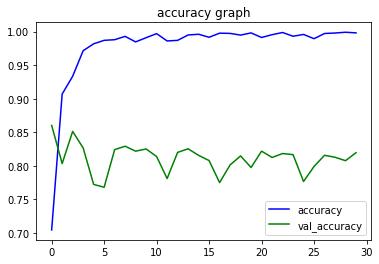

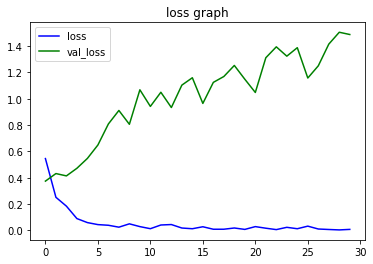

In [14]:
create_plot(history)